In [6]:
# -*- coding: utf-8 -*-
"""
2018-07-05

Blinker analysis: Survey of QEs

@author: Viva Horowitz
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
import numpy as np
import sys
sys.path.append(r'C:\Users\Viva\Documents')
sys.path.append(r'C:\Users\Viva\Documents\detect_peaks.py')
import detect_peaks
## http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb
from detect_peaks import detect_peaks

sns.set(style='ticks')
sns.set_context('poster')

%pylab inline
from matplotlib.mlab import frange

# ** set for each dataset
datadate = '2018-05-31_&_06-01'
datafolder = r'O:\User\Viva\data\2018-06-01_blinking-statistics'
analysisfolder = r'C:\Users\Viva\Documents\analysis\blinker_analysis\survey'

filenames = [r'..\2018-05-31_blinking-statistics\PLvstime04-20-2018.02,00pm.FIBedhBN.txt',
             r'..\2018-05-31_blinking-statistics\PLvstime04-21-2018.03,00pm.FIBedhBN.txt',
             r'4-22-2018.7,00pm\4-22-2018.7,00pm,01.txt',
             r'4-22-2018.11,00am\4-22-2018.11,00am, 06, ND2,0.txt',
             r'FIBedhBN.04-21-2018.10,00am\FIBedhBN.04-21-2018.10,00am.01.txt',
             r'FIBedhBN.04-22-2018.04,00pm\02.txt']  
             
dataname = 'survey of QEs'
labellist = ['04-20-2018.02,00pm', '04-21-2018.03,00pm', '4-22-2018.7,00pm', '4-22-2018.11,00am, ND2.0',
             '04-21-2018.10,00am', '04-22-2018.04,00pm']

print(np.__version__)
print(sns.__version__)
print(pd.__version__)
print(mpl.__version__)
print(sys.version)

Populating the interactive namespace from numpy and matplotlib
1.10.4
0.8.0
0.20.3
2.1.0
2.7.14 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:34:40) [MSC v.1500 64 bit (AMD64)]


In [3]:
## https://stackoverflow.com/questions/32765333/how-do-i-replicate-this-matlab-function-in-numpy/32765547#32765547
def histc(X, bins):
    map_to_bins = np.digitize(X,bins)
    r = np.zeros(bins.shape)
    for i in map_to_bins:
        r[i-1] += 1
    return [r, map_to_bins]

def manualnorm(histdata, binwidth):
    return (1/(histdata.sum()*binwidth))*histdata

def arangebylength(start, step, length):
    return np.arange(start = start, stop=start+step*(length-.5), step = step )

# rebin: combine two rows into one.
def rebindata(data, colname, timecolname):
    first = 1 # this is a value that indicates if we're on the first (=1) or the second (-1) of a pair of two bins
    rebinvals = []

    print data.tail()
    for value in data[colname]:
        #print 'value: ' + str(value)
        if first == 1:
            prevval = value
        else:
            # calculate average of the two bins
            combined = (prevval + value) /2.0 
            rebinvals.append(combined)
            del prevval
        first = -1 * first
         
    timesetting = data[timecolname][1]-data[timecolname][0]
    rebintimes = arangebylength(start =0, step = timesetting*2, length = len(rebinvals) )
    datadict = {timecolname: rebintimes, colname: rebinvals}
    rebinneddata = pd.DataFrame( data = datadict)
    return rebinneddata

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
   Time (s) 04-20-2018.02,00pm  04-20-2018.02,00pm
0                       60.800                6.25
1                       60.804                6.00
2                       60.808                4.00
3                       60.812                3.50
4                       60.816                3.75
Effective collection rate: 250.0 Hz
Time bin size: 0.004 sec
04-20-2018.02,00pm, 250.


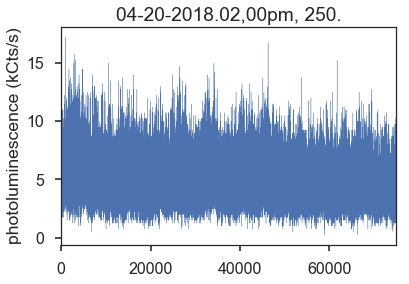

   Time (s) 04-21-2018.03,00pm  04-21-2018.03,00pm
0                      119.652               40.75
1                      119.656               34.25
2                      119.660               28.00
3                      119.664               31.00
4                      119.668               28.00
Effective collection rate: 250.0 Hz
Time bin size: 0.004 sec
04-21-2018.03,00pm, 250.


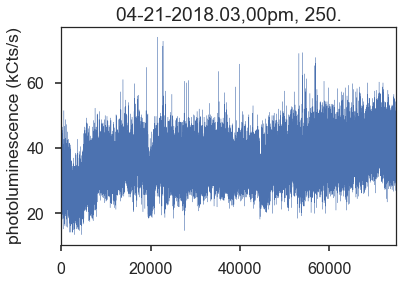

   Time (s) 4-22-2018.7,00pm  4-22-2018.7,00pm
0                       0.02              17.8
1                       0.03              18.4
2                       0.04              15.6
3                       0.05              12.4
4                       0.06              19.2
Effective collection rate: 100.0 Hz
Time bin size: 0.01 sec
4-22-2018.7,00pm, 100.0 


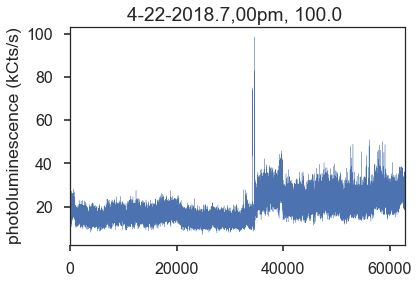

   Time (s) 4-22-2018.11,00am, ND2.0  4-22-2018.11,00am, ND2.0
0                             38.860                     23.50
1                             38.864                     22.50
2                             38.868                     30.50
3                             38.872                     24.50
4                             38.876                     30.75
Effective collection rate: 250.0 Hz
Time bin size: 0.004 sec
4-22-2018.11,00am, ND2.0


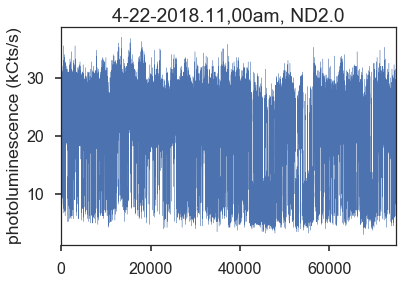

   Time (s) 04-21-2018.10,00am  04-21-2018.10,00am
0                         0.02                40.5
1                         0.03                38.7
2                         0.04                40.1
3                         0.05                50.0
4                         0.06                47.9
Effective collection rate: 100.0 Hz
Time bin size: 0.01 sec
04-21-2018.10,00am, 100.


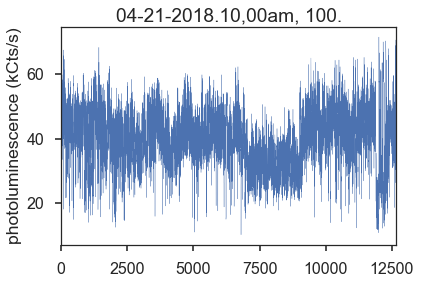

   Time (s) 04-22-2018.04,00pm  04-22-2018.04,00pm
0                       46.976               51.00
1                       46.980               39.75
2                       46.984               36.25
3                       46.988               29.00
4                       46.992               32.50
Effective collection rate: 250.0 Hz
Time bin size: 0.004 sec
04-22-2018.04,00pm, 250.


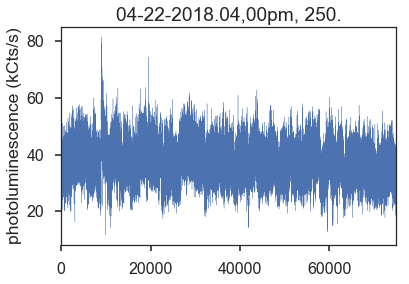

today: 2018-07-06


'C:\\Users\\Viva\\Documents\\analysis\\blinker_analysis\\survey\\taken-2018-05-31_&_06-01'

In [20]:
os.chdir(datafolder)

tname = 'Time (s)'
PLname = 'PL Intensity (kCts/s)'

rebins_to_do = [0,0,0,0,0,0] # number of times to rebin. **
titlenames = copy(labellist)
timesettings = [0.0] * len(filenames)
fps= [0.0] * len(filenames)
print fps

for i in range(len(filenames)):
    data = pd.read_csv(filenames[i],
                       skiprows=1,
                       header=None,
                       sep='\t',
                       names=[tname + ' ' + str(labellist[i]),str(labellist[i])],
                       usecols=[0,1])
    #data = data.set_index(tname)
    print(data.head())
    rebincount = 0
    
    origfilenames = filenames
    timecolname = tname + ' ' + str(labellist[i])
    for j in range(rebins_to_do[i]):
        data = rebindata(data, colname=str(labellist[i]), timecolname=timecolname)
        rebincount = rebincount + 1
    timesettings[i] = data[timecolname][1]-data[timecolname][0]
    fps[i] = 1/timesettings[i]
    print('Effective collection rate: ' + str(fps[i]) + ' Hz')
    print('Time bin size: ' + str(timesettings[i]) + ' sec')
    titlenames[i] = labellist[i] + ', ' + str(fps[i]) + ' Hz'
    print(titlenames[i])
    #plt.scatter(x=data['Time (s) ' + str(labellist[i])], y=str(labellist[i]),linewidth=0.3)
    data[str(labellist[i])].plot(linewidth=0.3)
    plt.ylabel('photoluminescence (kCts/s)')
    #plt.xlabel('Time(s)')
    plt.title(titlenames[i])
    plt.show()
    
    if i > 0:
        alldata = pd.concat([alldata,data], axis=1)
    else:
        alldata = data        
 
dataname = dataname + ',no rebins'# + str(rebins_to_do) + ' rebins' ## **
#filename = filename.replace('\\','-')
#origfilename = filename
os.chdir(analysisfolder)
today = datetime.date.isoformat(datetime.date.today())
if not os.path.exists('taken-' + datadate):
    os.makedirs('taken-' + datadate)
os.chdir('taken-' + datadate)

print('today: '+today)
os.getcwd()

In [22]:
alldata.head()

,"Time (s) 04-20-2018.02,00pm","04-20-2018.02,00pm","Time (s) 04-21-2018.03,00pm","04-21-2018.03,00pm","Time (s) 4-22-2018.7,00pm","4-22-2018.7,00pm","Time (s) 4-22-2018.11,00am, ND2.0","4-22-2018.11,00am, ND2.0","Time (s) 04-21-2018.10,00am","04-21-2018.10,00am","Time (s) 04-22-2018.04,00pm","04-22-2018.04,00pm"
0,60.800,6.25,119.652,40.75,0.02,17.8,38.860,23.50,0.02,40.5,46.976,51.00
1,60.804,6.00,119.656,34.25,0.03,18.4,38.864,22.50,0.03,38.7,46.980,39.75
2,60.808,4.00,119.660,28.00,0.04,15.6,38.868,30.50,0.04,40.1,46.984,36.25
3,60.812,3.50,119.664,31.00,0.05,12.4,38.872,24.50,0.05,50.0,46.988,29.00
4,60.816,3.75,119.668,28.00,0.06,19.2,38.876,30.75,0.06,47.9,46.992,32.50


In [23]:
alldata.tail()

,"Time (s) 04-20-2018.02,00pm","04-20-2018.02,00pm","Time (s) 04-21-2018.03,00pm","04-21-2018.03,00pm","Time (s) 4-22-2018.7,00pm","4-22-2018.7,00pm","Time (s) 4-22-2018.11,00am, ND2.0","4-22-2018.11,00am, ND2.0","Time (s) 04-21-2018.10,00am","04-21-2018.10,00am","Time (s) 04-22-2018.04,00pm","04-22-2018.04,00pm"
74995,360.780,3.25,419.632,32.25,NaN,NaN,338.840,20.00,NaN,NaN,346.956,29.50
74996,360.784,3.75,419.636,39.00,NaN,NaN,338.844,22.00,NaN,NaN,346.960,31.75
74997,360.788,5.00,419.640,37.25,NaN,NaN,338.848,21.50,NaN,NaN,346.964,32.75
74998,360.792,6.25,419.644,34.75,NaN,NaN,338.852,23.75,NaN,NaN,346.968,30.75
74999,360.796,3.25,419.648,35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
strlabellist = labellist
data = alldata[strlabellist]
data.head()

,"04-20-2018.02,00pm","04-21-2018.03,00pm","4-22-2018.7,00pm","4-22-2018.11,00am, ND2.0","04-21-2018.10,00am","04-22-2018.04,00pm"
0,6.25,40.75,17.8,23.50,40.5,51.00
1,6.00,34.25,18.4,22.50,38.7,39.75
2,4.00,28.00,15.6,30.50,40.1,36.25
3,3.50,31.00,12.4,24.50,50.0,29.00
4,3.75,28.00,19.2,30.75,47.9,32.50


In [25]:
strlabellist

['04-20-2018.02,00pm',
 '04-21-2018.03,00pm',
 '4-22-2018.7,00pm',
 '4-22-2018.11,00am, ND2.0',
 '04-21-2018.10,00am',
 '04-22-2018.04,00pm']

In [26]:
print max(data.max())
print min(data.min())

98.4
0.25


histdata initialized


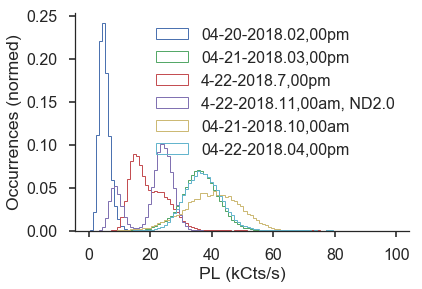

In [27]:
stepsize = 1
# adding a stepsize to the max is a workaround to a bug
binsequence= frange(min(data.min()),max(data.max())+stepsize,stepsize)

try:
    del histdata
except NameError:
    pass
#histdata=pd.DataFrame(columns=['ND', PLname, "Occurrences"])

histdict = []
for i in range(len(strlabellist)):
    plt.hist(data[strlabellist[i]], bins=binsequence,  histtype='step', linewidth=1, label=strlabellist[i], normed=True)
    newhistdata, toss = histc(data[strlabellist[i]], bins=np.asarray(binsequence))
    labellisttemp = [labellist[i]] * len(binsequence)
    ## Norm the newhistdata
    #   adding a stepsize to the max was a workaround to a bug
    #   now we remove that last bin, which should have been empty (but it's so buggy it wasn't empty)
    newhistdatanormed = manualnorm(newhistdata[:-1], stepsize)
    
    try:
        # append histogram to dataframe histdata

        histdata = histdata.append(pd.DataFrame(transpose([labellisttemp[:-1], binsequence[:-1],newhistdatanormed.tolist()])))
#        print "appended"
    except NameError:
        histdata = pd.DataFrame(transpose([labellisttemp[:-1], binsequence[:-1],newhistdatanormed.tolist()]))
        print "histdata initialized"
histdata = histdata.rename(index=str, columns={0: 'ND', 1: PLname, 2:"Probability"})           
tabledata = histdata.pivot("ND", PLname, "Probability")



#sns.distplot(data[strlabellist[9]], bins=numbins, kde=True, rug=False, hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"});
plt.xlabel('PL (kCts/s)')
plt.ylabel('Occurrences (normed)')
#ax = plt.gca()
#ax.set_yscale('symlog', linthreshy=1)
#ax.set_xscale('log')
sns.despine()
plt.legend()
plt.show()


In [28]:
labellist

['04-20-2018.02,00pm',
 '04-21-2018.03,00pm',
 '4-22-2018.7,00pm',
 '4-22-2018.11,00am, ND2.0',
 '04-21-2018.10,00am',
 '04-22-2018.04,00pm']

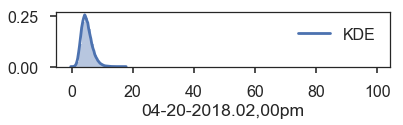

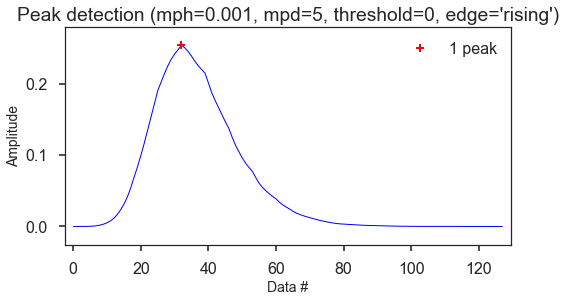

array([ 4.25503692])

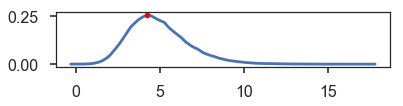

In [60]:
## I want to extract the peaks of these data
# https://stackoverflow.com/questions/37374983/get-data-points-from-seaborn-distplot

i = 0

# bw = bandwidth for calculating kde
#bw = 1
# mph = minimum peak height
mph = .001
# mpd = minimum peak distance
mpd = 5

plt.figure()
output1 = sns.distplot(data[strlabellist[i]],bins=binsequence,kde_kws={'label':'KDE'},).get_lines()[0].get_data()

## http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb



ind= detect_peaks(output1[1], valley=False, show=True, mph=mph, mpd=mpd)
#print ind

figure()
plot(output1[0], output1[1])
plot(output1[0][ind], output1[1][ind], 'r.')
output1[0][ind]

today: 2018-07-06
C:\Users\Viva\Documents\analysis\blinker_analysis\survey\taken-2018-05-31_&_06-01
0: 04-20-2018.02,00pm
1: 04-21-2018.03,00pm
2: 4-22-2018.7,00pm
3: 4-22-2018.11,00am, ND2.0
Made ylabel
4: 04-21-2018.10,00am
5: 04-22-2018.04,00pm


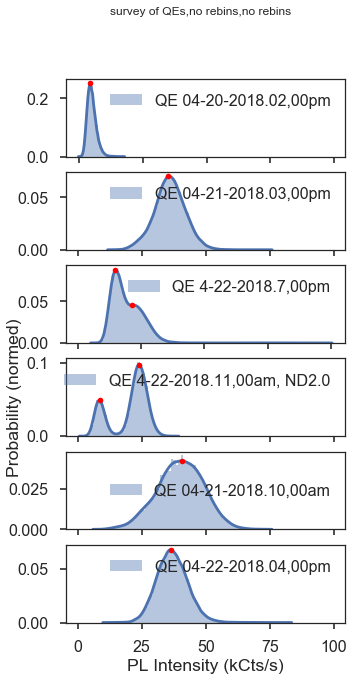

In [59]:
os.chdir(analysisfolder)
today = datetime.date.isoformat(datetime.date.today())
if not os.path.exists('taken-' + datadate):
    os.makedirs('taken-' + datadate)
os.chdir('taken-' + datadate)

print('today: '+today)
print os.getcwd()

peaksPL = {labellist[0]:None}
peaksprob = {labellist[0]:None}

made_ylabel=False
plt.figure(figsize=(5,10))
title(dataname)
for i in range(len(strlabellist)):
    print str(i) + ': ' + strlabellist[i]
    ax = plt.subplot(len(strlabellist), 1, i+1)
    # Calculate and plot histograms
    output = sns.distplot(data[strlabellist[i]],
                          bins=binsequence, 
        #                  kde_kws={'bw':bw},
                          label='QE ' + strlabellist[i],).get_lines()[0].get_data()
    ind= detect_peaks(output[1], valley=False, show=False, mph=mph, mpd=mpd)
    ax.plot(output[0][ind], output[1][ind], 'r.')
    # record these peaks
    peaksPL[labellist[i]] = output[0][ind]
    peaksprob[labellist[i]] =output[1][ind]
    legend()
    
    if made_ylabel == False:
        if i >= 0.5 * len(strlabellist):
            ylabel('Probability (normed)')
            print('Made ylabel')
            made_ylabel = True

xlabel(PLname);

suptitle(dataname)
plt.savefig(today + ',' + dataname+',PLvspowerhists.pdf', bbox_inches='tight')
plt.savefig(today + ',' + dataname+',PLvspowerhists.png', bbox_inches='tight', dpi=200)

0: 04-20-2018.02,00pm
1: 04-21-2018.03,00pm
2: 4-22-2018.7,00pm
3: 4-22-2018.11,00am, ND2.0
Made ylabel
4: 04-21-2018.10,00am
5: 04-22-2018.04,00pm


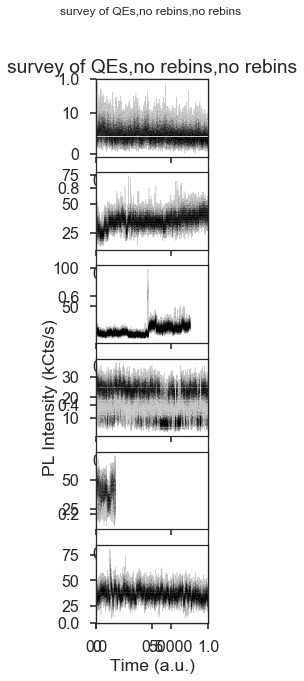

In [58]:
fig = plt.figure(figsize=(2,10))
title(dataname)
made_ylabel = False
for i in range(len(strlabellist)):
    print str(i) + ': ' + strlabellist[i]
    ax = fig.add_subplot(len(strlabellist), 1, i+1)
    thisdata = data[strlabellist[i]]
    thisdata.plot(marker='.', markersize=1,linestyle='None',legend=False, ax=ax, color='k',  alpha=.1)
    thisdata.plot(legend=False, linewidth=0.5, alpha=0.2, ax=ax, color='k')
    #legend()
    
    if made_ylabel == False:
        if i >= 0.5 * len(strlabellist):
            ylabel(PLname)
            print('Made ylabel')
            made_ylabel = True

xlabel('Time (a.u.)');
suptitle(dataname);

In [38]:
peaksPL

{'04-20-2018.02,00pm': array([ 4.25503692]),
 '04-21-2018.03,00pm': array([ 35.40362027]),
 '04-21-2018.10,00am': array([ 40.57474358]),
 '04-22-2018.04,00pm': array([ 36.46379752]),
 '4-22-2018.11,00am, ND2.0': array([  8.51729257,  23.82756914]),
 '4-22-2018.7,00pm': array([ 14.81668748,  21.57707981])}

In [39]:
peaksprob

{'04-20-2018.02,00pm': array([ 0.25464358]),
 '04-21-2018.03,00pm': array([ 0.07012713]),
 '04-21-2018.10,00am': array([ 0.04253716]),
 '04-22-2018.04,00pm': array([ 0.06769555]),
 '4-22-2018.11,00am, ND2.0': array([ 0.04900305,  0.0977245 ]),
 '4-22-2018.7,00pm': array([ 0.08747167,  0.04550904])}

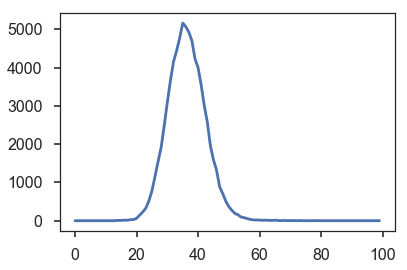

In [40]:
# The bug!
plot(newhistdata);

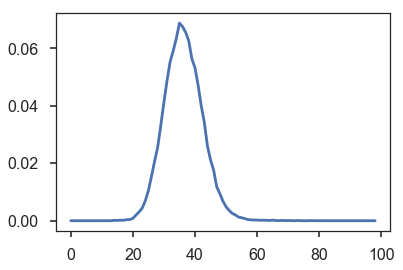

In [41]:
# Dealt with the bug!
plot(newhistdatanormed);

In [42]:
histdata.head()

,ND,PL Intensity (kCts/s),Probability
0,"04-20-2018.02,00pm",0.25,0.00118666666667
1,"04-20-2018.02,00pm",1.25,0.02192
2,"04-20-2018.02,00pm",2.25,0.111506666667
3,"04-20-2018.02,00pm",3.25,0.220773333333
4,"04-20-2018.02,00pm",4.25,0.241466666667


In [43]:
labellist

['04-20-2018.02,00pm',
 '04-21-2018.03,00pm',
 '4-22-2018.7,00pm',
 '4-22-2018.11,00am, ND2.0',
 '04-21-2018.10,00am',
 '04-22-2018.04,00pm']

In [44]:
tabledata

PL Intensity (kCts/s),0.25,1.25,10.25,11.25,12.25,13.25,14.25,15.25,16.25,17.25,...,9.25,90.25,91.25,92.25,93.25,94.25,95.25,96.25,97.25,98.25
ND,,,,,,,,,,,,,,,,,,,,,
"04-20-2018.02,00pm",0.00118666666667,0.02192,0.00512,0.00222666666667,0.001,0.000346666666667,0.000106666666667,4e-05,1.33333333333e-05,1.33333333333e-05,...,0.0128533333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"04-21-2018.03,00pm",0.0,0.0,0.0,0.0,0.0,2.66666666667e-05,0.000106666666667,0.000146666666667,0.00028,0.000466666666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"04-21-2018.10,00am",0.0,0.0,0.000157990362588,0.000552966269058,0.00039497590647,0.0012639229007,0.001342918082,0.00165889880717,0.00189588435105,0.00244885062011,...,7.89951812939e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"04-22-2018.04,00pm",0.0,0.0,0.0,1.33335111135e-05,1.33335111135e-05,1.33335111135e-05,0.000120001600021,0.000106668088908,0.000186669155589,0.000160002133362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"4-22-2018.11,00am, ND2.0",0.0,0.0,0.0284137121828,0.0161868824918,0.00728009706796,0.00421338951186,0.00249336657822,0.00288003840051,0.00416005546741,0.00784010453473,...,0.0431072414299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"4-22-2018.7,00pm",0.0,0.0,0.0152996242756,0.0341017639941,0.0599726166974,0.0809399477807,0.0889638922499,0.0863847672419,0.0766732471502,0.0629975163981,...,0.00396421066038,1.59205247405e-05,0.0,0.0,0.0,0.0,1.59205247405e-05,1.59205247405e-05,0.0,1.59205247405e-05


In [51]:
transpose(tabledata)

ND,"04-20-2018.02,00pm","04-21-2018.03,00pm","04-21-2018.10,00am","04-22-2018.04,00pm","4-22-2018.11,00am, ND2.0","4-22-2018.7,00pm"
PL Intensity (kCts/s),,,,,,
0.25,0.00118666666667,0.0,0.0,0.0,0.0,0.0
1.25,0.02192,0.0,0.0,0.0,0.0,0.0
10.25,0.00512,0.0,0.000157990362588,0.0,0.0284137121828,0.0152996242756
11.25,0.00222666666667,0.0,0.000552966269058,1.33335111135e-05,0.0161868824918,0.0341017639941
12.25,0.001,0.0,0.00039497590647,1.33335111135e-05,0.00728009706796,0.0599726166974
13.25,0.000346666666667,2.66666666667e-05,0.0012639229007,1.33335111135e-05,0.00421338951186,0.0809399477807
14.25,0.000106666666667,0.000106666666667,0.001342918082,0.000120001600021,0.00249336657822,0.0889638922499
15.25,4e-05,0.000146666666667,0.00165889880717,0.000106668088908,0.00288003840051,0.0863847672419
16.25,1.33333333333e-05,0.00028,0.00189588435105,0.000186669155589,0.00416005546741,0.0766732471502


In [45]:
peaksPL

{'04-20-2018.02,00pm': array([ 4.25503692]),
 '04-21-2018.03,00pm': array([ 35.40362027]),
 '04-21-2018.10,00am': array([ 40.57474358]),
 '04-22-2018.04,00pm': array([ 36.46379752]),
 '4-22-2018.11,00am, ND2.0': array([  8.51729257,  23.82756914]),
 '4-22-2018.7,00pm': array([ 14.81668748,  21.57707981])}

In [52]:
sns.heatmap(transpose(tabledata))
#ylabel(PLname)
#title(dataname)

## decrease number of ticks on x axis.
ax = plt.gca()
#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
#ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

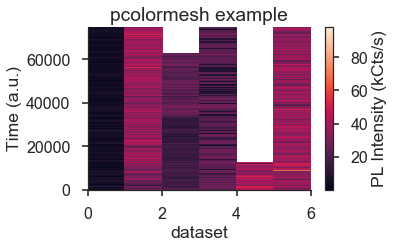

KeyError: '04-21-2018.03,00pm'

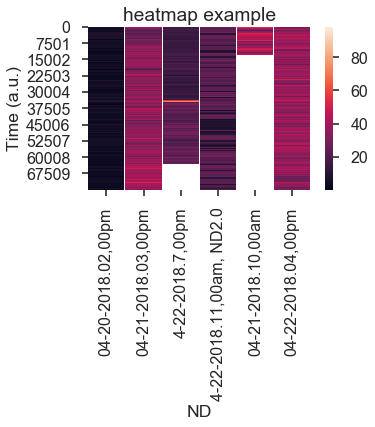

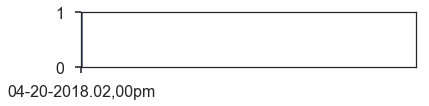

In [56]:
## This cell doesn't have to be run. Just some thoughts about the data system.

figure(figsize(5,3))
plt.pcolormesh(data)
sns.despine()

cbar =colorbar()
cbar.set_label(PLname)
title('pcolormesh example')
ylabel('Time (a.u.)')
xlabel('dataset')
plt.show()

figure()
sns.heatmap(data, linewidths=0)
title('heatmap example')
ylabel('Time (a.u.)')
xlabel('ND')


# https://stackoverflow.com/questions/49020709/seaborn-heatmap-with-numerical-axes
# You cannot "convince" heatmap not to produce a categorical plot. 
# Best use another image plot, which uses numerical axes. For example, use a pcolormesh plot. 
# The assumption is of course that the columns and rows are equally spread. 


## Some thoughts about figure spacing
plt.figure(figsize(6,1))
for ND in labellist:
    plt.axvline(x=ND)
sns.despine()
xlabel('ND')
plt.gca().invert_xaxis()
    
plt.figure()
for thispower in powlist:
   # print thispower
    plt.axvline(x=thispower)
#plt.xlim(xmin=min(powlist), xmax = max(powlist))
sns.despine()
ax = plt.gca()
ax.set_xscale('log')
xlabel('measured power (W)' )    
    
plt.figure()
for ND in labellist:
    plt.axvline(x=10**-ND)
plt.xlim(xmax=10**-min(labellist))   
sns.despine()
xlabel('10^-ND')

plt.figure()
for thispower in powlist:
  #  print thispower
    plt.axvline(x=thispower)
plt.xlim(xmin=min(powlist), xmax = max(powlist))
sns.despine()
xlabel('measured power (W)' )




plt.show()